# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li>
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB`
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#computation libraries
import math
from scipy.sparse import hstack
from scipy import sparse

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

#data loading and transformation
import pandas as pd

#scikit-learn libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler
from sklearn.metrics import roc_curve,auc,confusion_matrix
from sklearn.naive_bayes import MultinomialNB


In [3]:
processed_data = pd.read_csv("/content/drive/MyDrive/NB_Donors_Choose/preprocessed_data.csv",nrows = 50000)

In [5]:
processed_data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [6]:
processed_data['project_is_approved'].value_counts()

,count
project_is_approved,
1,41993
0,8007


In [7]:
X = processed_data.drop('project_is_approved',axis = 1)
y = processed_data['project_is_approved']


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
print("The dim of the train data is ",X_train.shape,y_train.shape)
print("The dim of the test data is ",X_test.shape,y_test.shape)

The dim of the train data is  (37500, 8) (37500,)
The dim of the test data is  (12500, 8) (12500,)


In [9]:
X_train.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
48110,pa,mr,grades_3_5,0,math_science,appliedsciences mathematics,the elementary school i act lead teacher fourt...,269.95
14587,tx,mrs,grades_prek_2,1,literacy_language math_science,literacy mathematics,my classroom full tech savvy 6 7 year old stud...,299.96
13788,ks,ms,grades_3_5,0,literacy_language,literacy literature_writing,our school title one school kansas city ks low...,312.98
12132,az,ms,grades_prek_2,0,literacy_language,literature_writing,most kids come low income families due many ki...,346.52
21488,il,mrs,grades_prek_2,15,health_sports,gym_fitness,the students pre k class three four five year ...,719.39


In [12]:
feature_list_bow = []
feature_list_tfidf = []

In [13]:


ss_vect = CountVectorizer()
ss_vect.fit(X_train['school_state'])
ss_vect_train = ss_vect.transform(X_train['school_state'])
ss_vect_test = ss_vect.transform(X_test['school_state'])
print("Total number of scholl stastes ",len(ss_vect.get_feature_names_out()))
feature_list_bow.extend(ss_vect.get_feature_names_out())
feature_list_tfidf.extend(ss_vect.get_feature_names_out())

tp_vect = CountVectorizer()
tp_vect.fit(X_train['teacher_prefix'])
tp_vect_train = tp_vect.transform(X_train['teacher_prefix'])
tp_vect_test = tp_vect.transform(X_test['teacher_prefix'])
print("Total number of teacher prefix values ",len(tp_vect.get_feature_names_out()))
feature_list_bow.extend(tp_vect.get_feature_names_out())
feature_list_tfidf.extend(tp_vect.get_feature_names_out())

pgc_vect = CountVectorizer()
pgc_vect.fit(X_train['project_grade_category'])
pgc_vect_train = pgc_vect.transform(X_train['project_grade_category'])
pgc_vect_test = pgc_vect.transform(X_test['project_grade_category'])
print("Total number of project grade category values ",len(pgc_vect.get_feature_names_out()))
feature_list_bow.extend(pgc_vect.get_feature_names_out())
feature_list_tfidf.extend(pgc_vect.get_feature_names_out())

cc_vect = CountVectorizer()
cc_vect.fit(X_train['clean_categories'])
cc_vect_train = cc_vect.transform(X_train['clean_categories'])
cc_vect_test = cc_vect.transform(X_test['clean_categories'])
print("Total number of clean categories values ",len(cc_vect.get_feature_names_out()))
feature_list_bow.extend(cc_vect.get_feature_names_out())
feature_list_tfidf.extend(cc_vect.get_feature_names_out())

sc_vect = CountVectorizer()
sc_vect.fit(X_train['clean_subcategories'])
sc_vect_train = sc_vect.transform(X_train['clean_subcategories'])
sc_vect_test = sc_vect.transform(X_test['clean_subcategories'])
print("Total number of clean subcat values ",len(sc_vect.get_feature_names_out()))
feature_list_bow.extend(sc_vect.get_feature_names_out())
feature_list_tfidf.extend(sc_vect.get_feature_names_out())


Total number of scholl stastes  51
Total number of teacher prefix values  5
Total number of project grade category values  4
Total number of clean categories values  9
Total number of clean subcat values  30


In [14]:
essay_vect = CountVectorizer(min_df = 10,ngram_range=(1,4),max_features=5000)
essay_vect.fit(X_train['essay'])
essay_vect_train = essay_vect.transform(X_train['essay'])
essay_vect_test = essay_vect.transform(X_test['essay'])
print("Total number of teacher prefix values ",len(essay_vect.get_feature_names_out()))
feature_list_bow.extend(essay_vect.get_feature_names_out())


Total number of teacher prefix values  5000


In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
scaler_number_prev_posted_projects_train = scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
scaler_number_prev_posted_projects_test = scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


scaler_price_train =  scaler.fit_transform(X_train['price'].values.reshape(-1,1))
scaler_price_test =  scaler.transform(X_test['price'].values.reshape(-1,1))

feature_list_bow.extend(['prev_posted_projects','price'])

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
# scaler_number_prev_posted_projects_train = scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
# scaler_number_prev_posted_projects_test = scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

# scaler_price_train =  scaler.fit_transform(X_train['price'].values.reshape(-1,1))
# scaler_price_test =  scaler.transform(X_test['price'].values.reshape(-1,1))

# feature_list.extend(['prev_posted_projects','price'])



In [16]:
len(feature_list_bow)

5101

In [17]:
X_tr = hstack((ss_vect_train,tp_vect_train,pgc_vect_train,cc_vect_train,sc_vect_train,essay_vect_train,scaler_number_prev_posted_projects_train,scaler_price_train)).tocsr()
X_te = hstack((ss_vect_test, tp_vect_test, pgc_vect_test, cc_vect_test, sc_vect_test,essay_vect_test,scaler_number_prev_posted_projects_test,scaler_price_test)).tocsr()


In [ ]:
sparse.save_npz("/content/drive/MyDrive/NB_Donors_Choose/count_vect_train.npz",X_tr)
sparse.save_npz("/content/drive/MyDrive/NB_Donors_Choose/count_vect_test.npz",X_te)

<h2>Count based vectorization without priors</h2>

In [18]:
mnb = MultinomialNB()
param_grid = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

grid_cv = GridSearchCV(mnb,param_grid,cv = 5,scoring = 'roc_auc',return_train_score=True)

grid_cv.fit(X_tr,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [19]:
grid_search_cv_count_based = pd.DataFrame(grid_cv.cv_results_).loc[:,['param_alpha','mean_train_score','mean_test_score']]

In [20]:
grid_search_cv_count_based

,param_alpha,mean_train_score,mean_test_score
0,0.00001,0.738338,0.688336
1,0.00050,0.738338,0.688371
2,0.00010,0.738338,0.688356
3,0.00500,0.738333,0.688386
4,0.00100,0.738337,0.688376
5,0.05000,0.738285,0.688374
6,0.01000,0.738328,0.688388
7,0.10000,0.738236,0.688354
8,0.50000,0.737869,0.688160
9,1.00000,0.737420,0.687920


In [21]:
alpha = grid_search_cv_count_based['param_alpha']
train_auc = grid_search_cv_count_based['mean_train_score']
cv_auc = grid_search_cv_count_based['mean_test_score']


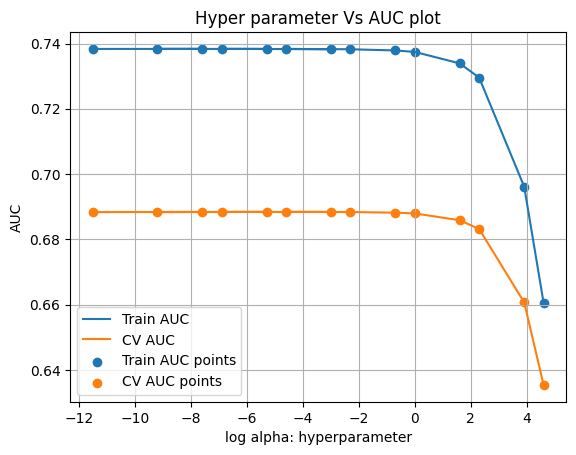

In [22]:
log_alpha = [math.log(x) for x in alpha.values]

plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()



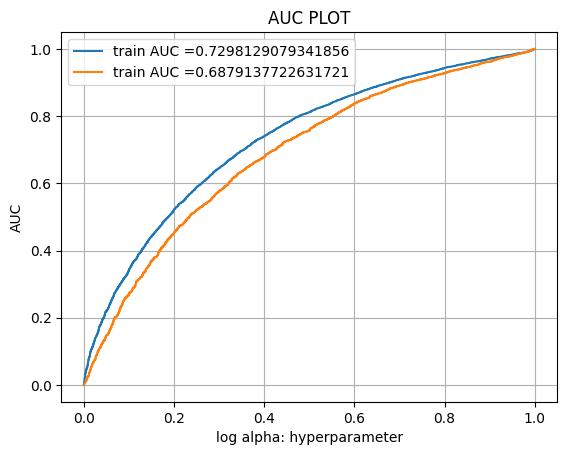

In [23]:
best_alpha = grid_cv.best_estimator_.alpha
mnb = MultinomialNB(alpha = best_alpha)
mnb.fit(X_tr,y_train)
count_based_ytrain_pred = mnb.predict_proba(X_tr)[:,1]
count_based_ytest_pred = mnb.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, count_based_ytrain_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, count_based_ytest_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOT")
plt.grid()
plt.show()

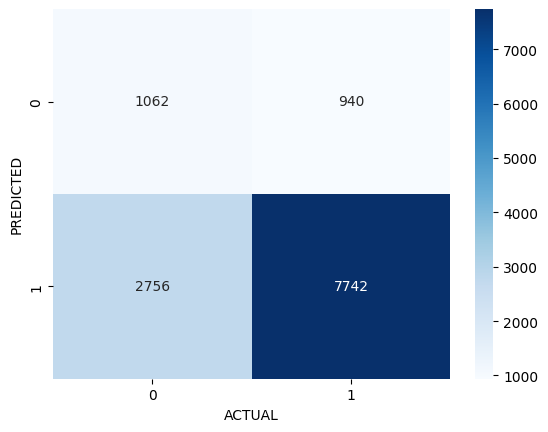

In [24]:
y_test_pred = mnb.predict(X_te)
cm  = confusion_matrix(y_test,y_test_pred)

ax = plt.axes()
sns.heatmap(cm,cmap = 'Blues',annot = True,fmt = 'd',ax = ax)
ax.set_xlabel("ACTUAL")
ax.set_ylabel("PREDICTED")
plt.show()

In [42]:
feature_log_prob_dict_class0 = dict(zip(feature_list_bow,mnb.feature_log_prob_[0]))
feature_log_prob_dict_sorted_class0 = {k: v for k, v in sorted(feature_log_prob_dict_class0.items(), key=lambda item: item[1],reverse = True)}
feature_log_prob_dict_sorted_class0 = dict(list(feature_log_prob_dict_sorted_class0.items())[:20])
feature_log_prob_dict_sorted_class0

{'students': np.float64(-3.220052065243882),
 'school': np.float64(-4.3167637613711385),
 'learning': np.float64(-4.623464196059871),
 'my': np.float64(-4.703376214256439),
 'classroom': np.float64(-4.743429148788287),
 'not': np.float64(-4.94030248761832),
 'learn': np.float64(-4.975614716415482),
 'they': np.float64(-5.029565771721225),
 'help': np.float64(-5.033248469140055),
 'the': np.float64(-5.048266199873119),
 'my students': np.float64(-5.0895564056579214),
 'many': np.float64(-5.220837408427165),
 'nannan': np.float64(-5.231396771758609),
 'we': np.float64(-5.369306978509627),
 'need': np.float64(-5.384078879757231),
 'work': np.float64(-5.399285054054872),
 'come': np.float64(-5.530295993813533),
 'year': np.float64(-5.5518759838276),
 'able': np.float64(-5.581563623994498),
 'love': np.float64(-5.588996677740715)}

<h2> Count based vectorization with priors value of [0.5,0.5]</h2>

In [ ]:
mnb_priors = MultinomialNB(class_prior=[0.5,0.5])
param_grid = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

grid_cv_priors = GridSearchCV(mnb_priors,param_grid,cv = 5,scoring = 'roc_auc',return_train_score=True)

grid_cv_priors.fit(X_tr,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
grid_search_cv_count_based_priors = pd.DataFrame(grid_cv_priors.cv_results_).loc[:,['param_alpha','mean_train_score','mean_test_score']]

In [ ]:
grid_search_cv_count_based_priors

,param_alpha,mean_train_score,mean_test_score
0,0.00001,0.741293,0.692073
1,0.00050,0.741292,0.692105
2,0.00010,0.741292,0.692091
3,0.00500,0.741288,0.692120
4,0.00100,0.741292,0.692110
5,0.05000,0.741248,0.692108
6,0.01000,0.741283,0.692122
7,0.10000,0.741206,0.692092
8,0.50000,0.740856,0.691898
9,1.00000,0.740421,0.691639


In [ ]:
alpha_priors = grid_search_cv_count_based_priors['param_alpha']
train_auc_priors = grid_search_cv_count_based_priors['mean_train_score']
cv_auc_priors = grid_search_cv_count_based_priors['mean_test_score']


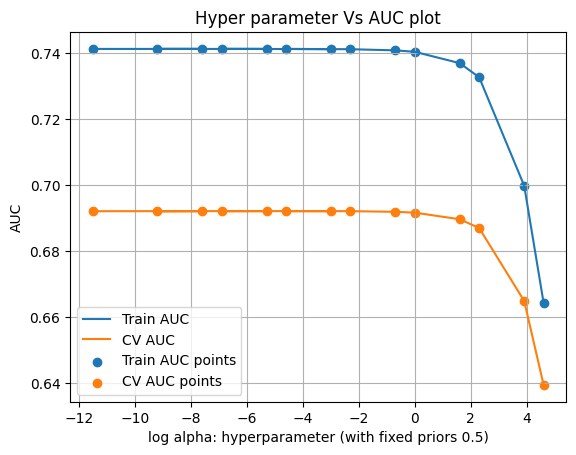

In [ ]:
log_alpha = [math.log(x) for x in alpha_priors.values]

plt.plot(log_alpha, train_auc_priors, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc_priors, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc_priors, label='Train AUC points')
plt.scatter(log_alpha, cv_auc_priors, label='CV AUC points')


plt.legend()
plt.xlabel("log alpha: hyperparameter (with fixed priors 0.5)")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()




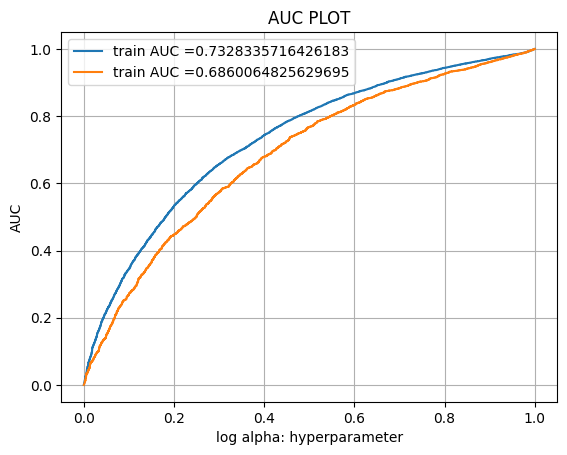

In [ ]:
best_alpha = grid_cv_priors.best_estimator_.alpha
mnb_priors = MultinomialNB(class_prior=[0.5,0.5],alpha = best_alpha)
mnb_priors.fit(X_tr,y_train)
count_based_ytrain_priors_pred = mnb_priors.predict_proba(X_tr)[:,1]
count_based_ytest_priors_pred = mnb_priors.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, count_based_ytrain_priors_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, count_based_ytest_priors_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOT")
plt.grid()
plt.show()

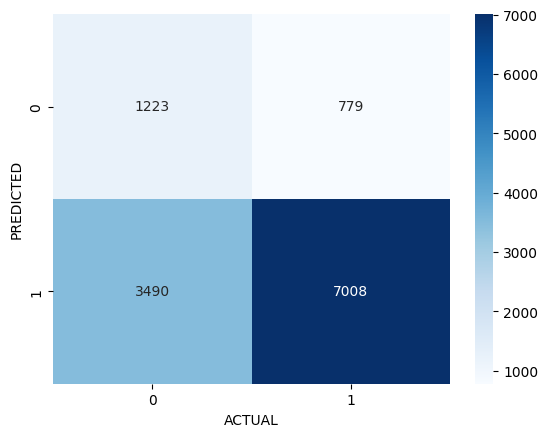

In [ ]:
y_test_priors_pred = mnb_priors.predict(X_te)
cm  = confusion_matrix(y_test,y_test_priors_pred)

ax = plt.axes()
sns.heatmap(cm,cmap = 'Blues',annot = True,fmt = 'd',ax = ax)
ax.set_xlabel("ACTUAL")
ax.set_ylabel("PREDICTED")
plt.show()

<h1> TFIDF Vectoriser </h1>

In [43]:
essay_vect_tfidf = TfidfVectorizer(min_df = 10,ngram_range=(1,4),max_features=5000)
essay_vect_tfidf.fit(X_train['essay'])
essay_vect_tfidf_train = essay_vect_tfidf.transform(X_train['essay'])
essay_vect_tfidf_test = essay_vect_tfidf.transform(X_test['essay'])
print("Total number of essay toekns ",len(essay_vect_tfidf.get_feature_names_out()))
feature_list_tfidf.extend(essay_vect_tfidf.get_feature_names_out())
feature_list_tfidf.extend(['prev_posted_projects','price'])

Total number of essay toekns  5000


In [44]:
X_tfidf_tr = hstack((ss_vect_train,tp_vect_train,pgc_vect_train,cc_vect_train,sc_vect_train,essay_vect_tfidf_train,scaler_number_prev_posted_projects_train,scaler_price_train)).tocsr()
X_tfidf_te = hstack((ss_vect_test, tp_vect_test, pgc_vect_test, cc_vect_test, sc_vect_test,essay_vect_tfidf_test,scaler_number_prev_posted_projects_test,scaler_price_test)).tocsr()


In [ ]:
sparse.save_npz("/content/drive/MyDrive/NB_Donors_Choose/tfidf_vect_train.npz",X_tfidf_tr)
sparse.save_npz("/content/drive/MyDrive/NB_Donors_Choose/tfidf__vect_test.npz",X_tfidf_te)

In [45]:
mnb = MultinomialNB()
param_grid = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

grid_cv = GridSearchCV(mnb,param_grid,cv = 5,scoring = 'roc_auc',return_train_score=True)

grid_cv.fit(X_tfidf_tr,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [46]:
grid_search_cv_tfidf_based = pd.DataFrame(grid_cv.cv_results_).loc[:,['param_alpha','mean_train_score','mean_test_score']]

In [47]:
grid_search_cv_tfidf_based

,param_alpha,mean_train_score,mean_test_score
0,0.00001,0.724405,0.670953
1,0.00050,0.724399,0.670948
2,0.00010,0.724404,0.670952
3,0.00500,0.724342,0.670914
4,0.00100,0.724393,0.670944
5,0.05000,0.723763,0.670655
6,0.01000,0.724278,0.670881
7,0.10000,0.723125,0.670291
8,0.50000,0.718059,0.666987
9,1.00000,0.711867,0.662652


In [48]:
alpha = grid_search_cv_tfidf_based['param_alpha']
train_auc = grid_search_cv_tfidf_based['mean_train_score']
cv_auc = grid_search_cv_tfidf_based['mean_test_score']


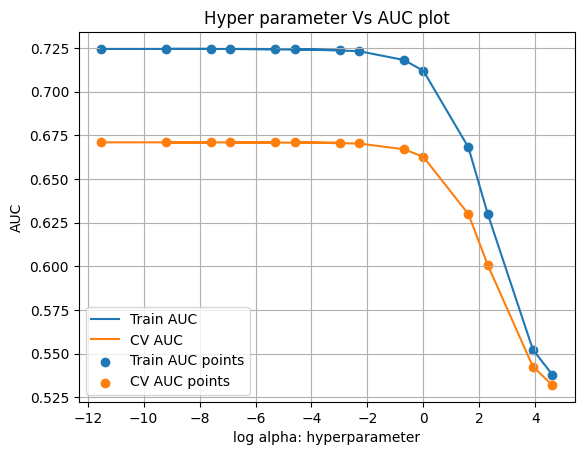

In [49]:
log_alpha = [math.log(x) for x in alpha.values]

plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()



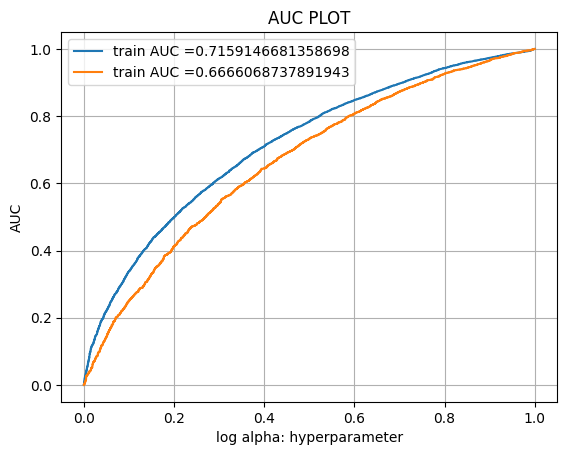

In [53]:
best_alpha = grid_cv.best_estimator_.alpha
mnb = MultinomialNB(alpha = best_alpha)
mnb.fit(X_tfidf_tr,y_train)
tfidf_based_ytrain_pred = mnb.predict_proba(X_tfidf_tr)[:,1]
tfidf_based_ytest_pred = mnb.predict_proba(X_tfidf_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, tfidf_based_ytrain_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, tfidf_based_ytest_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOT")
plt.grid()
plt.show()

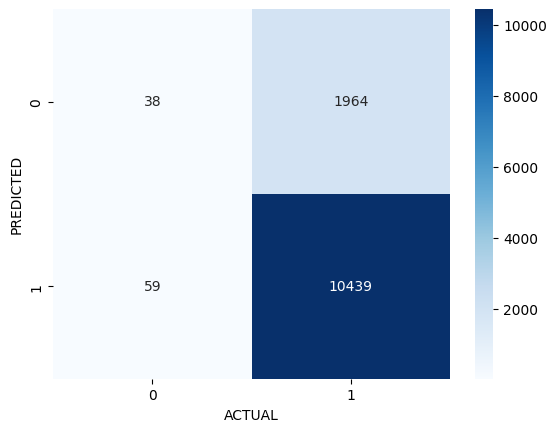

In [54]:
y_tfidf_test_pred = mnb.predict(X_tfidf_te)
cm  = confusion_matrix(y_test,y_tfidf_test_pred)

ax = plt.axes()
sns.heatmap(cm,cmap = 'Blues',annot = True,fmt = 'd',ax = ax)
ax.set_xlabel("ACTUAL")
ax.set_ylabel("PREDICTED")
plt.show()

In [55]:
feature_log_prob_dict_class0 = dict(zip(feature_list_tfidf,mnb.feature_log_prob_[0]))
feature_log_prob_dict_sorted_class0 = {k: v for k, v in sorted(feature_log_prob_dict_class0.items(), key=lambda item: item[1],reverse = True)}
feature_log_prob_dict_sorted_class0 = dict(list(feature_log_prob_dict_sorted_class0.items())[:20])

feature_log_prob_dict_class1 = dict(zip(feature_list_tfidf,mnb.feature_log_prob_[1]))
feature_log_prob_dict_sorted_class1 = {k: v for k, v in sorted(feature_log_prob_dict_class1.items(), key=lambda item: item[1],reverse = True)}
feature_log_prob_dict_sorted_class1 = dict(list(feature_log_prob_dict_sorted_class1.items())[:20])

In [56]:
feature_log_prob_dict_sorted_class0

{'literacy_language': np.float64(-3.6134257203078235),
 'grades_prek_2': np.float64(-3.657720634995088),
 'math_science': np.float64(-3.71801965827268),
 'ms': np.float64(-3.8028274967367226),
 'grades_3_5': np.float64(-3.9011077914814862),
 'literature_writing': np.float64(-4.4305097972523315),
 'health_sports': np.float64(-4.562059027452428),
 'grades_6_8': np.float64(-4.619100965258257),
 'ca': np.float64(-4.7321781086223185),
 'specialneeds': np.float64(-4.88125560495023),
 'students': np.float64(-4.889510423620162),
 'appliedlearning': np.float64(-4.906084466261597),
 'health_wellness': np.float64(-4.906084466261597),
 'appliedsciences': np.float64(-5.01206590555642),
 'grades_9_12': np.float64(-5.082834975305911),
 'mr': np.float64(-5.130625638326408),
 'tx': np.float64(-5.208776196426832),
 'music_arts': np.float64(-5.212564079672029),
 'fl': np.float64(-5.45148610286164),
 'visualarts': np.float64(-5.574402771886197)}

In [57]:
feature_log_prob_dict_sorted_class1

{'literacy_language': np.float64(-3.520826663003822),
 'grades_prek_2': np.float64(-3.6723130865630473),
 'math_science': np.float64(-3.8219264146127223),
 'ms': np.float64(-3.838712410817756),
 'grades_3_5': np.float64(-3.865035753950112),
 'literature_writing': np.float64(-4.3569885499892695),
 'health_sports': np.float64(-4.485775823027746),
 'grades_6_8': np.float64(-4.6937344212478305),
 'ca': np.float64(-4.722233759315413),
 'health_wellness': np.float64(-4.7328018893539365),
 'students': np.float64(-4.883199460233454),
 'specialneeds': np.float64(-4.970549121938236),
 'appliedlearning': np.float64(-5.054248140569792),
 'grades_9_12': np.float64(-5.1455979188660415),
 'mr': np.float64(-5.184470866277266),
 'appliedsciences': np.float64(-5.214471351475987),
 'music_arts': np.float64(-5.276933920457727),
 'tx': np.float64(-5.471689438143254),
 'ny': np.float64(-5.588546118365094),
 'fl': np.float64(-5.601124900506026)}

5101

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions